In [111]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import matplotlib.pyplot as plt

import os
import numpy as np

In [112]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)


In [113]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

In [114]:
iris = load_iris()

In [115]:
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [116]:
tree_clf = DecisionTreeClassifier(max_depth=2)

In [117]:
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [118]:
# visulaise the trained decision tree
# outputs a graph definition file called iris_tree.dot
export_graphviz(
    tree_clf,
    out_file=image_path("iris_tree.dot"),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [119]:
# running dot command line tool can convert this into png or pdf
# dot -Tpng iris_tree.dot -o iris_tree.png

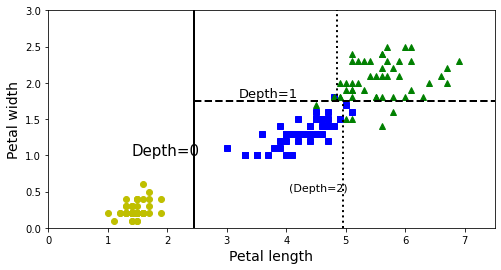

In [120]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

In [48]:
# can also use decision trees for regression

In [121]:
tree_reg = DecisionTreeRegressor(max_depth=2)

In [122]:
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [123]:
# decision tree classifiers will aim to minimise impurities - number of datasets misclassified. IT does this in a greedy way at each depth
# decision tree regressors will instead try to minimise MSE in the same way

In [124]:
# overfitting can be an issue so regularisation hyperparameters are used:
# min_sample_split, min_samples_leaf, min_weight_fraction_leaf, max_depth, max_leaf_nodes, max_features

In [125]:
# decision trees can be sensitive to small variations in training data